In [2]:
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

In [1]:
conda install pygeos --channel conda-forge

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\vikag\anaconda3

  added / updated specs:
    - pygeos


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.13.0               |   py39hcbf5309_1         1.0 MB  conda-forge
    geos-3.10.3                |       h39d44d4_0         1.5 MB  conda-forge
    pygeos-0.12.0              |   py39hd0596d2_3         415 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following NEW packages will be INSTALLED:

  geos               conda-forge/win-64::geos-3.10.3-h39d44d4_0
  pygeos             conda-forge/win-64::pygeos-0.12.0-py39hd0596d2_3

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.13.0-py39haa95532_0 --> conda-forge::conda-4.13.0-py39hcbf5309_1




conda-4.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_excel(r'C:\Users\vikag\Desktop\Data-Science-Projects\Techno Industries Inc\Techno Industries Inc. Data.xlsx')

In [3]:
df.head().T

,Date,Customer ID,Product,State,Zip Code,Business Type,Cost (per unit),Price (per unit),Quantity,Revenue (total),Cost (total)
0,2015-10-22,ID36557,Microcontroller,Georgia,30642,Transportation,19.100,100.81,205.0,20666.05,3915.500
1,2015-09-22,ID42068,Wiring components,Wisconsin,53933,Industrial,16.255,100.71,14.0,1409.94,227.570
2,2015-12-26,ID6402,Wiring components,Indiana,47403,Industrial,16.255,98.64,13.0,1282.32,211.315
3,2015-04-04,ID1745,Wiring components,Illinois,60090,Transportation,16.255,98.64,23.0,2268.72,373.865
4,2015-05-25,ID6925,Thermostat,Florida,33009,Medical,15.245,97.01,16.0,1552.16,243.920


In [8]:
df.fillna('New Mexico', inplace=True)

In [10]:
df['Quantity'] = df['Quantity'].astype(int)

# Encode Categories


In [15]:
df.Product = LabelEncoder().fit_transform(df.Product)
df.State = LabelEncoder().fit_transform(df.State)
df['Business Type'] = LabelEncoder().fit_transform(df['Business Type'])

In [16]:
df.head().T

,0,1,2,3,4
Date,2015-10-22 00:00:00,2015-09-22 00:00:00,2015-12-26 00:00:00,2015-04-04 00:00:00,2015-05-25 00:00:00
Customer ID,ID36557,ID42068,ID6402,ID1745,ID6925
Product,6,10,10,10,9
State,8,46,11,10,7
Zip Code,30642,53933,47403,60090,33009
Business Type,5,2,2,5,4
Cost (per unit),19.1,16.255,16.255,16.255,15.245
Price (per unit),100.81,100.71,98.64,98.64,97.01
Quantity,205,14,13,23,16
Revenue (total),20666.05,1409.94,1282.32,2268.72,1552.16


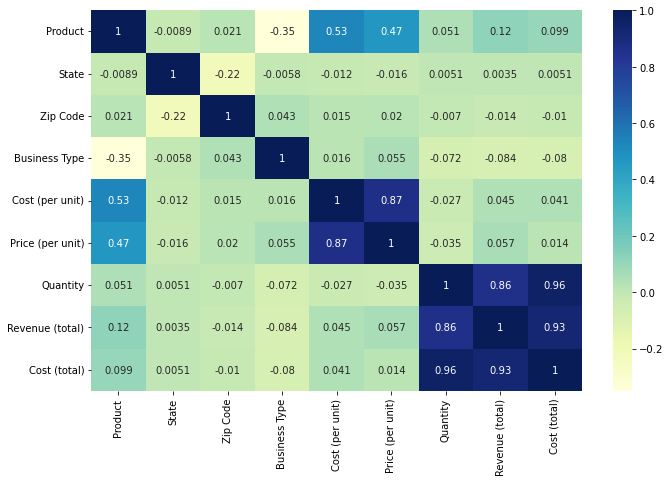

In [17]:
sns.heatmap(df.corr(), yticklabels=True, annot=True, cmap="YlGnBu")
plt.gcf().set_size_inches(11, 7)

In [18]:
df_d = df.drop(['Customer ID', 'Date'], axis=1)

In [19]:
for col in df_d.columns:
    print(col)

Product
State
Zip Code
Business Type
Cost (per unit)
Price (per unit)
Quantity
Revenue (total)
Cost (total)


In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score

In [21]:
import warnings
warnings.filterwarnings("ignore")

# Logistic Regression Hyperparameter Tuning


In [25]:
X = df_d.drop(columns = ['Product','Zip Code', 'State'])
y = df_d['Product']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

LR_mod = LogisticRegression(max_iter = 1000)

grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

LR_GS = GridSearchCV(LR_mod, grid, cv = None, n_jobs = -1)

LR_GS.fit(x_train,y_train)

exception calling callback for <Future at 0x2960490f340 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "C:\Users\vikag\anaconda3\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Users\vikag\anaconda3\lib\site-packages\joblib\parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\vikag\anaconda3\lib\site-packages\joblib\parallel.py", line 794, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Users\vikag\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\vikag\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\vikag\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 531, in apply_async
    future = self._workers.submit(SafeFunction(func))


KeyboardInterrupt: 

In [ ]:
print("tuned hpyerparameters :(best parameters) ",LR_GS.best_params_)

print("accuracy :",LR_GS.best_score_)

# Random Forest Classifier


In [30]:
X = df_d.drop(columns = ['Product','Zip Code', 'State'])
y = df_d['Product']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

RF_m = RandomForestClassifier( verbose = 2 , n_jobs = -1).fit(X_train, y_train)

prediction_RF = RF_m.predict(X_test)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.7s


building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


0.9995606326889279


In [31]:
print(accuracy_score(RF_m.predict(X_test), y_test))

print(classification_report(y_test, prediction_RF))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s


0.9995606326889279
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1610
           1       1.00      1.00      1.00      1185
           2       1.00      1.00      1.00      1872
           3       1.00      1.00      1.00       783
           4       1.00      1.00      1.00       649
           5       1.00      1.00      1.00      1119
           6       0.99      1.00      0.99        77
           7       1.00      1.00      1.00       783
           8       1.00      1.00      1.00       485
           9       1.00      1.00      1.00       408
          10       1.00      0.99      1.00       133

    accuracy                           1.00      9104
   macro avg       1.00      1.00      1.00      9104
weighted avg       1.00      1.00      1.00      9104



[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


# Hyperparameter Tuning

In [37]:
# n_jobs=-1, to utilise all processors!
# cv=None, to use the default 5-fold cross validation.
# verbose=2, to display the score is also displayed.

X = df_d.drop(columns = ['Product','Zip Code', 'State'])
y = df_d['Product']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


n_estimators = [0.01, 0.1, 1, 10, 100, 200]
max_depth = [40]
min_samples_split = [4, 7, 10]

param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

RF_mod = RandomForestClassifier()

RF_GS = GridSearchCV(estimator = RF_mod, param_grid = param_grid, verbose = 2, cv = None, n_jobs = -1)

RF_GS.fit(x_train, y_train)

RF_GS.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'max_depth': 40, 'min_samples_split': 4, 'n_estimators': 200}

In [38]:
print(f'Train Accuracy - : {RF_GS.score(x_train, y_train):.3f}')

print(f'Test Accuracy - : {RF_GS.score(x_test, y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 1.000


In [34]:
# n_jobs=-1, to utilise all processors!
# cv=None, to use the default 5-fold cross validation.
# verbose=2, to display the score is also displayed.

X = df_d.drop(columns = ['Business Type','Zip Code', 'State'])
y = df_d['Business Type']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


n_estimators = [1, 10, 100, 200, 300,]
max_depth = [70]
min_samples_split = [20, 30, 50]

param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

RF_mod = RandomForestClassifier()

RF_GS = GridSearchCV(estimator = RF_mod, param_grid = param_grid, verbose = 2, cv = None, n_jobs = -1)

RF_GS.fit(x_train, y_train)

RF_GS.best_params_

Fitting 5 folds for each of 15 candidates, totalling 75 fits


{'max_depth': 70, 'min_samples_split': 20, 'n_estimators': 300}

In [35]:
print(f'Train Accuracy - : {RF_GS.score(x_train, y_train):.3f}')

print(f'Test Accuracy - : {RF_GS.score(x_test, y_test):.3f}')

Train Accuracy - : 0.751
Test Accuracy - : 0.637
